<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/Atividade02Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Universidade Federal de Uberlândia
# Programa de Pós Graduação Em Engenharia Química
# Métodos Numéricos Aplicados à Engenharia Química
# Aluno: Felipe Augusto Paes de Godoi
# Atividade 02: Comparação de métodos de resolução de sistemas de equações algébricas lineares
# Métodos avaliados: Eliminação de Gauss com pivotamento, Jacobi, Gauss-Seidel, SOR, Numpy


In [2]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

fatal: destination path 'MetodosNumericos2020_3' already exists and is not an empty directory.
/content/MetodosNumericos2020_3


In [4]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from SOR import SOR


/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/SOR.py:41: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/Jacobi.py:32: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i,j]*x[j]
/content/MetodosNumericos2020_3/SOR.py:36: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]


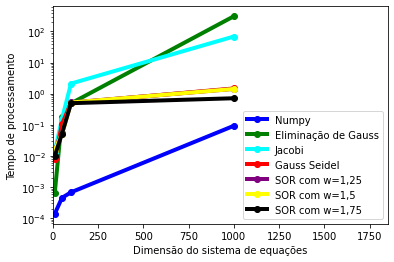

In [5]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_eliminacaodegauss = []
cpu_time_gaussseidel = []
cpu_time_jacobi = []
cpu_time_SOR125 = []
cpu_time_SOR150 = []
cpu_time_SOR175 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)

  # numpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # eliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_eliminacaodegauss.append(time.clock()-t0)

  # gaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_gaussseidel.append(time.clock()-t0)

  # jacobi
  t0 = time.clock()
  x= np.random.rand(size)
  z = jacobi(A,f,x)
  cpu_time_jacobi.append(time.clock()-t0)

  # sor125: sor com omega igual a 1,25
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.25
  x = SOR(A,f,x0,omega)
  cpu_time_SOR125.append(time.clock()-t0)

  # sor150: sor com omega igual 1,5
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.5
  x = SOR(A,f,x0,omega)
  cpu_time_SOR150.append(time.clock()-t0)

  # sor175: sor com omega igual a 1,75
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.75
  x = SOR(A,f,x0,omega)
  cpu_time_SOR175.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='blue',label='Numpy')
plt.semilogy(SIZE,cpu_time_eliminacaodegauss,'o-',linewidth=4, color='green',label='Eliminação de Gauss')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='cyan',label='Jacobi')
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='purple',label='SOR com w=1,25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR com w=1,5')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR com w=1,75')

plt.xlabel('Dimensão do sistema de equações')
plt.ylabel('Tempo de processamento')
plt.xlim([0,1850])
plt.legend(loc=4)
plt.show()

In [6]:
# Imprimindo os tempos de processamento
print (cpu_time_numpy)
print(cpu_time_eliminacaodegauss)
print(cpu_time_gaussseidel)
print(cpu_time_jacobi)
print(cpu_time_SOR125)
print(cpu_time_SOR150)
print(cpu_time_SOR175)

[0.00013799999999997148, 0.0004530000000000367, 0.0006820000000002935, 0.093248]
[0.0006279999999998509, 0.17219200000000012, 0.48974399999999996, 306.447996]
[0.007815000000000127, 0.10489799999999994, 0.506291, 1.4751760000000331]
[0.0135320000000001, 0.15391199999999983, 2.1124939999999994, 68.52232299999997]
[0.015583000000000125, 0.053096000000000254, 0.5218290000000003, 1.4290169999999875]
[0.015409000000000006, 0.05161300000000013, 0.5197430000000001, 1.4175690000000145]
[0.00989400000000007, 0.052006, 0.49551800000000057, 0.7140560000000278]


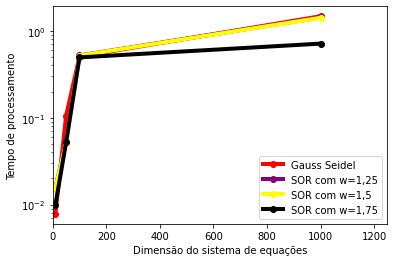

In [7]:
#Comparação do método de Gauss-Seidel com o método SOR para três valores diferentes de omega
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='purple',label='SOR com w=1,25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR com w=1,5')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR com w=1,75')

plt.xlabel('Dimensão do sistema de equações')
plt.ylabel('Tempo de processamento')
plt.xlim([0,1250])
plt.legend(loc=4)
plt.show()